In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
plt.rc('font',size=12)
from pdb3 import lsext
from tqdm import tqdm
# import pyemma
import os
import mplhelv
import tol_colors as tc
tol_cmap = tc.tol_cmap('rainbow_PuBr')

In [2]:
weights = pickle.load(open('/home/pdb3/SMO/6XBL_CHL/Analysis/remaking_MSM/2ms/weights_msm_200_95_300_23.pkl','rb'))
weightsc = np.concatenate(weights)

In [3]:
pwd

'/home/pdb3/SMO/6XBL_CHL/Analysis/CHL_entry'

In [4]:
def gap(x):
    m = np.max(x)
    n = np.min(x)
    gap = (m-n)/14
    return gap
def free_energy_plot(x,y,xmul=1,ymul=1,weightsClassA=weights,fig_wid=10,fig_hig=7,vmax=5):
    R = 0.001987
    T = 310
    cmap = tol_cmap
    x_data = x*xmul
    y_data = y*ymul
    Max_energy = vmax
    x_bins=200
    y_bins=200
    x_data_min =  np.min(x_data)
    y_data_min =  np.min(y_data)
    x_data_max =  np.max(x_data)
    y_data_max =  np.max(y_data)
    x_hist_lim_low =  x_data_min -0.5
    y_hist_lim_low =  y_data_min -0.5
    x_hist_lim_high = x_data_max +0.5
    y_hist_lim_high = y_data_max  +0.5
    hist= np.histogram2d(x_data,y_data, bins=[x_bins,y_bins],
				 range = [[x_hist_lim_low,x_hist_lim_high],[y_hist_lim_low,y_hist_lim_high]],
				 density= True,weights=weightsClassA)
    prob_density = hist[0]
    prob_density = hist[0]
    xedge = hist[1]
    yedge = hist[2]
    x_bin_size = xedge[1]-xedge[0]
    y_bin_size = yedge[1]-yedge[0]
    free_energy = -R*T*np.log(prob_density*x_bin_size*y_bin_size)
    min_free_energy = np.min(free_energy)
    delta_free_energy = free_energy - min_free_energy
    xx = [(xedge[i]+xedge[i+1])/2 for i in range(len(xedge)-1)]
    yy = [(yedge[i]+yedge[i+1])/2 for i in range(len(yedge)-1)]
    fig, axs = plt.subplots(1,1,figsize=(fig_wid,fig_hig))
    #cd = axs.contourf(xx,yy,delta_free_energy.T, vmin=0.0, vmax=Max_energy,cmap=cmap)
    contours = np.linspace(0,Max_energy,Max_energy+1)
    cdl = axs.contour(xx,yy,delta_free_energy.T,levels=range(int(Max_energy)+1),colors='k',linewidths = 0.2)
    cd = axs.contourf(xx,yy,delta_free_energy.T,np.linspace(0,Max_energy,30), vmin=0.0, vmax=Max_energy,cmap=cmap)
    cbar = fig.colorbar(cd,ticks=range(int(Max_energy)+1))
    cbar.ax.set_yticklabels(range(int(Max_energy)+1))
    cbar.ax.set_ylabel('Free Energy (kcal/mol)')
    cbar.ax.tick_params(axis='y', which='major', width=1.0)
    xlimlow = np.min(x_data)-gap(x_data)
    ylimlow = np.min(y_data)-gap(y_data)
    xlimhigh = np.max(x_data)+gap(x_data)
    ylimhigh = np.max(y_data)+gap(y_data)
    axs.set_xlim(xlimlow, xlimhigh)
    axs.set_ylim(ylimlow, ylimhigh)
    xticks = range(int(np.ceil(x_data_min)),int(np.floor(x_data_max)+1),30)
    yticks = range(int(np.ceil(y_data_min)),int(np.floor(y_data_max)+1),2)
    axs.set_xticks(xticks)
    axs.set_xticklabels(xticks)
    axs.set_yticks(xticks)
    axs.set_yticklabels(xticks)
    axs.tick_params(axis='both')
    # axs.set_yticks(np.around(np.arange(y_lim_low,y_lim_high,2),2))
    # axs.set_yticklabels(np.around(np.arange(y_lim_low,y_lim_high,2),2))
    # plt.rc('xtick', labelsize=10)
    # plt.rc('ytick', labelsize=10)
    #plt.tight_layout()
    axs.grid(True,ls='--',alpha=0.7)
    fig.show()
    return fig,axs,delta_free_energy,xx,yy

In [5]:
distI = pickle.load(open('../remaking_MSM/2ms/distI_2ms.pkl','rb'))
trajs_56, trajs_56_index, weights_new = [], [], []
for i,j in enumerate(distI):
    if 'p1496' not in j:
        trajs_56.append(j)# for j in distI if 'p1496' not in j]
        trajs_56_index.append(i)# for i,j in enumerate(distI) if 'p1496' not in j]
# weights_newc = np.concatenate(weights_new)
len(trajs_56), len(weights)

(10472, 10472)

In [6]:
data = []
trajname_frames = []
for traj in tqdm(trajs_56):
    data_traj = pickle.load(open(f'./CHL_entry_npy5/{traj}_anglexyplane.pkl','rb'))
    data.append(data_traj)
    trajname_frames.extend([f'{traj}-{k}' for k in range(1,len(data_traj)+1)])

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10472/10472 [02:15<00:00, 77.05it/s]


In [7]:
totdist = pickle.load(open('../remaking_MSM/2ms/totdist_2ms.pkl','rb'))

In [8]:
totdist_56 = [totdist[j][:,:89] for j in trajs_56_index]
totdist_56c = np.concatenate(totdist_56)
totdist_56c.shape

(15153047, 89)

In [9]:
# data = [data[j][:,0] for j in range(len(data))]

In [10]:
datac = np.concatenate(data)
datac.shape

(15153047, 9)

In [11]:
indices = np.where(np.isfinite(datac[:,0]))

In [12]:
len(trajname_frames)

15153047

/tmp/ipykernel_13457/3143524224.py:32: RuntimeWarning: divide by zero encountered in log
  free_energy = -R*T*np.log(prob_density*x_bin_size*y_bin_size)


Text(-175, -7, 'Membrane')

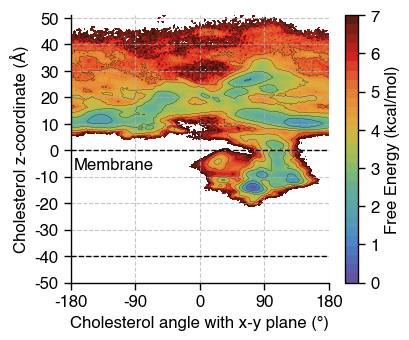

In [30]:

plt.rc('axes', linewidth=1.0)
a,b,c,d,e = free_energy_plot(np.arctan2(-datac[:,8],datac[:,6])*180/np.pi,-totdist_56c[:,0],vmax=7,weightsClassA=weightsc,fig_wid=300/72,fig_hig=250/72)
b.set_ylim(-50,51)
b.set_yticks(range(-50,60,10))
b.set_yticklabels(range(-50,60,10))
b.set_xlim(-180,180)
b.set_xticks(range(-180,181,90))
b.set_xticklabels(range(-180,181,90))
b.set_xlabel('Cholesterol angle with x-y plane (°)')
b.set_ylabel('Cholesterol z-coordinate (Å)')
b.spines['bottom'].set_linewidth(1)
b.spines['left'].set_linewidth(1)
b.tick_params(axis='x', which='major', width=1.0)  # Change major tick width for x-axis
b.tick_params(axis='y', which='major', width=1.0)  # Change major tick width for y-axis
# b.text(-175,45,'Pathway 1')
b.axhline(0,ls='--',lw=1,c='k')
b.axhline(-40,ls='--',lw=1,c='k')
b.text(-175,-7,'Membrane')
# a.savefig('./CHL_angle_entry_TM23_updated2.png',transparent=True,dpi=300)
# a.savefig('./CHL_angle_entry_TM23_updated2.svg',transparent=True,dpi=300)

In [ ]:
fig_wid=10
fig_hig=7
vmax=5
fig_wid=270/72
fig_hig=250/72
fig, b = plt.subplots(1,1,figsize=(fig_wid,fig_hig))

# fig,axs = plt.subplots()
Max_energy=1
cd =b.contourf(xx,yy,err_free_energy.T,
                 np.linspace(0,Max_energy,Max_energy*25+1), vmin=0.0, vmax=Max_energy,cmap=tol_cmap)
cbar = fig.colorbar(cd,ticks=[i/5 for i in range(Max_energy*5+1)])
cbar.ax.set_yticklabels([i/5 for i in range(Max_energy*5+1)])
cbar.ax.set_ylabel('Error in Free Energy (kcal/mol)')
b.set_ylim(-50,51)
b.set_yticks(range(-50,60,20))
b.set_yticklabels(range(-50,60,20))
b.set_xlim(-180,180)
b.set_xticks(range(-180,181,90))
b.set_xticklabels(range(-180,181,90))
b.set_xlabel('Cholesterol angle with x-y plane (°)')
b.set_ylabel('Cholesterol z-coordinate (Å)')
b.spines['bottom'].set_linewidth(1)
b.spines['left'].set_linewidth(1)
b.tick_params(axis='x', which='major', width=1.0)  # Change major tick width for x-axis
b.tick_params(axis='y', which='major', width=1.0)  # Change major tick width for y-axis
b.text(30,-45,'Pathway 1')
b.grid(True,ls='--',alpha=0.7)
fig.tight_layout()
fig.savefig('./Error_FE_CHL_entry_TM23_updated.png',dpi=300,transparent=True)